# Polynomial Regression

## Importing the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [6]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset

In [7]:
from sklearn.linear_model import LinearRegression
lin_regressor= LinearRegression()
lin_regressor.fit(X,y) #we are using the whole data and not splitting it


LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor=PolynomialFeatures(degree=2)
#(x1)^2  so, degree means that 2
X_poly=poly_regressor.fit_transform(X) #the matrix of feature we want to transform
#now building y=b0+b1x1+b1x1^2
lin_regressor2=LinearRegression()
lin_regressor2.fit(X_poly,y)  #creating the new linear regression model using the X_poly

LinearRegression()

## Visualising the Linear Regression results

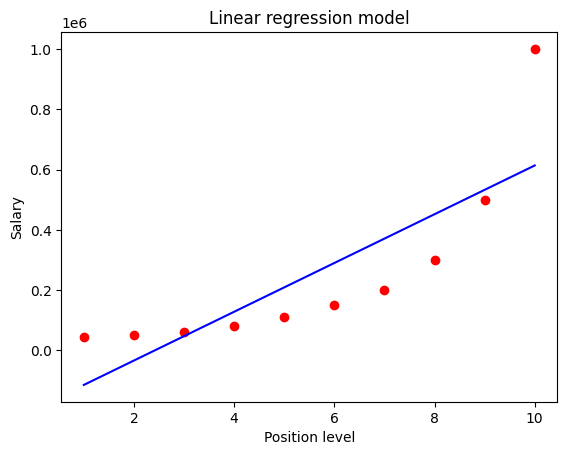

In [35]:
plt.scatter(X,y,color='red')  #for real data to keep in the 2d surface
plt.plot(X, lin_regressor.predict(X),color='blue')   #plot(X coordinates, y=lin_regressor.predict(X) would be predicated salaries)
plt.title('Linear regression model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

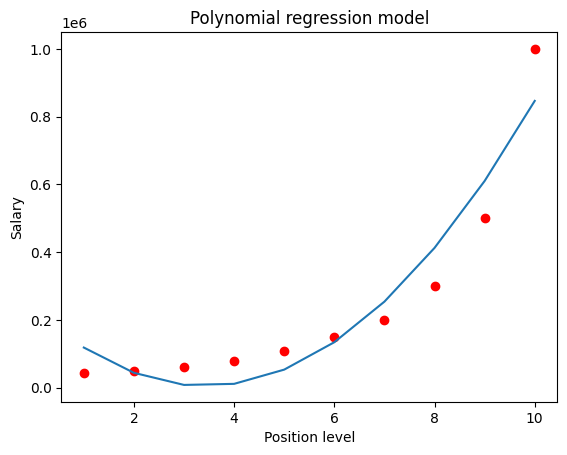

In [36]:
plt.scatter(X,y,color='red')  #for real data to keep in the 2d surface
plt.plot(X, lin_regressor2.predict(X_poly))   #plot(X coordinates, y=lin_regressor2.predict(X_poly) would be predicated salaries)
plt.title('Polynomial regression model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Practice with much higher degree

In [37]:
from sklearn.preprocessing import PolynomialFeatures
#now we are targetting x1,x1^2,x1^2,x1^4,x1^5,x1^6
poly_regressor=PolynomialFeatures(degree=6)

X_poly=poly_regressor.fit_transform(X) #the matrix of feature we want to transform
#now building y=b0+b1x1+b1x1^2+b2x1^3+b3x1^4+b4x1^5+b5x1^6
lin_regressor2=LinearRegression()
lin_regressor2.fit(X_poly,y)  #creating the new linear regression model using the X_poly

LinearRegression()

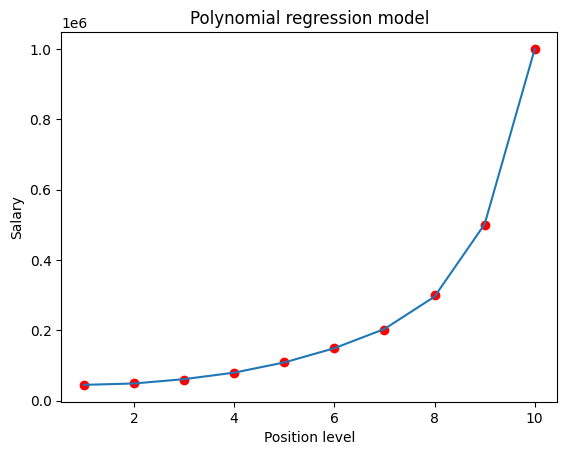

In [38]:
#this plot fits the data when the degree is 6

plt.scatter(X,y,color='red')  #for real data to keep in the 2d surface
plt.plot(X, lin_regressor2.predict(X_poly))   #plot(X coordinates, y=lin_regressor2.predict(X_poly) would be predicated salaries)
plt.title('Polynomial regression model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

<ipython-input-45-f03387ee3323>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(X),max(X),0.1)


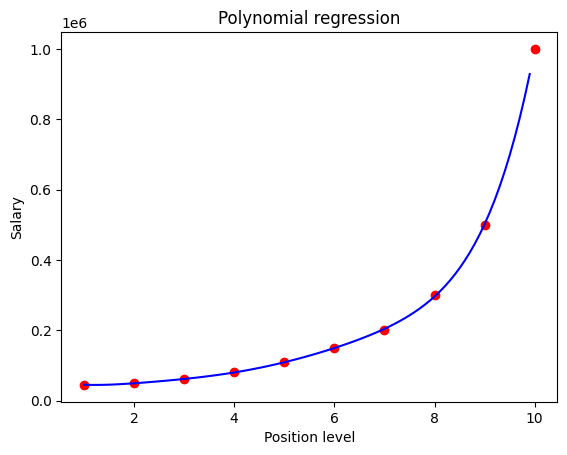

In [45]:
X_grid=np.arange(min(X),max(X),0.1)  #instead of taking integers , we are taking 0.1, 0.2, 0.3 etc
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_regressor2.predict(poly_regressor.fit_transform(X_grid)),color='blue')
plt.title('Polynomial regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [46]:
lin_regressor.predict([[6.5]]) #we want to see the salary of regional managed at year 2. So, it should be in between level 6 & 7. As it's not more than level 7
#we will use array here


#the result is misleading as it crosses salary of level 77

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [50]:
#for polynomial , we need to provide x1, x1^2,x1^3,x1^4,x1^5,x1^6
lin_regressor2.predict(poly_regressor.fit_transform([[6.5]]))


array([174192.81930595])